### Model training

In [1]:
def create_prediction_dataset(dataset, look_back=1):
    return X[:len(X) - look_back], X[look_back:]

In [2]:
import pandas as pd

data = pd.read_csv(r'data/aapl.csv')

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
look_back = 1
X = data.filterred.values

x, y = create_prediction_dataset(X, look_back=look_back)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25,
                                                    shuffle=False)

x_train = np.reshape(x_train, (x_train.shape[0], look_back, 1))
x_test = np.reshape(x_test, (x_test.shape[0], look_back, 1))

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import mean_absolute_error, mean_squared_error
from keras.optimizers import RMSprop
model = Sequential(name='draft_network')
model.add(LSTM(units=64, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(units=128,return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(units=1))

optimizer = RMSprop(lr=10e-3)
model.compile(loss=mean_absolute_error,
              optimizer=optimizer)

In [8]:
model.fit(x_train, 
          y_train, 
          epochs=100,
          verbose=1,
          validation_split=0.2,
          shuffle=False)

Train on 754 samples, validate on 189 samples
Epoch 1/100
754/754 [==============================] - 0s 200us/step - loss: 0.0278 - val_loss: 0.1888
Epoch 2/100
754/754 [==============================] - 0s 228us/step - loss: 0.0314 - val_loss: 0.1554
Epoch 3/100
754/754 [==============================] - 0s 185us/step - loss: 0.0268 - val_loss: 0.0418
Epoch 4/100
754/754 [==============================] - 0s 187us/step - loss: 0.0312 - val_loss: 0.0581
Epoch 5/100
754/754 [==============================] - 0s 228us/step - loss: 0.0267 - val_loss: 0.1515
Epoch 6/100
754/754 [==============================] - 0s 209us/step - loss: 0.0282 - val_loss: 0.1099
Epoch 7/100
754/754 [==============================] - 0s 195us/step - loss: 0.0234 - val_loss: 0.0350
Epoch 8/100
754/754 [==============================] - 0s 229us/step - loss: 0.0291 - val_loss: 0.0342
Epoch 9/100
754/754 [==============================] - 0s 210us/step - loss: 0.0253 - val_loss: 0.0689
Epoch 10/100
754/754 [=====

754/754 [==============================] - 0s 234us/step - loss: 0.0186 - val_loss: 0.0258
Epoch 80/100
754/754 [==============================] - 0s 189us/step - loss: 0.0188 - val_loss: 0.1085
Epoch 81/100
754/754 [==============================] - 0s 238us/step - loss: 0.0182 - val_loss: 0.0411
Epoch 82/100
754/754 [==============================] - 0s 206us/step - loss: 0.0199 - val_loss: 0.1006
Epoch 83/100
754/754 [==============================] - 0s 195us/step - loss: 0.0171 - val_loss: 0.0354
Epoch 84/100
754/754 [==============================] - 0s 200us/step - loss: 0.0195 - val_loss: 0.0462
Epoch 85/100
754/754 [==============================] - 0s 215us/step - loss: 0.0194 - val_loss: 0.1041
Epoch 86/100
754/754 [==============================] - 0s 193us/step - loss: 0.0179 - val_loss: 0.0559
Epoch 87/100
754/754 [==============================] - 0s 206us/step - loss: 0.0171 - val_loss: 0.0533
Epoch 88/100
754/754 [==============================] - 0s 236us/step - loss:

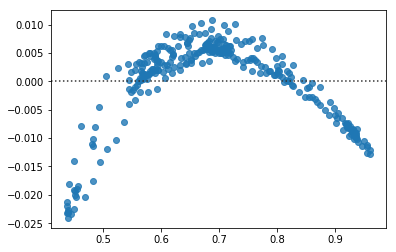

In [13]:
import seaborn as sns
sns.residplot(x=y_test, y=y_pred)

In [18]:
model.save('models/aapl-1.h5')

In [4]:
x_test.shape

(315, 1, 1)

In [12]:
np.array([1]).reshape((1,1,1)).flatten()[0]

1